<a href="https://colab.research.google.com/github/VithGab/-Data_Sciences_VG/blob/main/Homework_Ecommerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [36]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'brazilian-ecommerce' dataset.
Path to dataset files: /kaggle/input/brazilian-ecommerce


In [37]:
csv_path = path + "/olist_order_items_dataset.csv"
df = pd.read_csv(csv_path)

In [38]:
df.info()
print("====================================================================")
print(df.head())
print("====================================================================")
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id         

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [39]:
csv_path2 = path + "/olist_orders_dataset.csv"
df2 = pd.read_csv(csv_path2)

In [40]:
df2.info()
print("====================================================================")
print(df2.head())
print("====================================================================")
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [41]:
csv_path3 = path + "/olist_products_dataset.csv"
df3 = pd.read_csv(csv_path3)
df3.info()
print("====================================================================")
print(df3.head())
print("====================================================================")
df3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
                         product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e29

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [42]:
#provavelmente se trata dos mesmos produtos,primeiro tenatr tirar a media dos numericos e em name colocar a moda dos valores, o restante dos nulos que sao 2 pode excluir, mas n é obrigatorio, adicionar a media pode ser uma boa

In [43]:
#Checando duplicatas
#Checking duplicates
duplicate_rows = df[df.duplicated()]
print("DF:\n",duplicate_rows.sum())
print("=============================")
duplicate_rows2 = df2[df2.duplicated()]
print("DF 2:\n",duplicate_rows2.sum())
print("=============================")
duplicate_rows3 = df3[df3.duplicated()]
print("DF 3:\n",duplicate_rows3.sum())

DF:
 order_id                 0
order_item_id            0
product_id               0
seller_id                0
shipping_limit_date      0
price                  0.0
freight_value          0.0
dtype: object
DF 2:
 order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: object
DF 3:
 product_id                      0
product_category_name           0
product_name_lenght           0.0
product_description_lenght    0.0
product_photos_qty            0.0
product_weight_g              0.0
product_length_cm             0.0
product_height_cm             0.0
product_width_cm              0.0
dtype: object


In [44]:
#valores nulos
#null values
df.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [45]:
df2.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [46]:
df3.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [47]:
# tratar os valores nulos, com colocar media nos numericos e moda nas categorias
#duplivcatas não há oque tratar
#tratar os outliers, ver se exclui ou não, dependendo da quantidade nos dts

In [48]:
#PADRONIZAÇÃO
df2['order_status'] = df2['order_status'].str.title()
print(df2['order_status'].head())
print("=========================================")
df3['product_category_name'] = df3['product_category_name'].str.title()
print(df3['product_category_name'].head())

0    Delivered
1    Delivered
2    Delivered
3    Delivered
4    Delivered
Name: order_status, dtype: object
0               Perfumaria
1                    Artes
2            Esporte_Lazer
3                    Bebes
4    Utilidades_Domesticas
Name: product_category_name, dtype: object


In [49]:
#Inconsistencias
df_types = pd.DataFrame(df)
print(df_types.dtypes)
print("=============================\n")

df_types2 = pd.DataFrame(df2)
print(df_types2.dtypes)
print(" =============================\n")

df_types3 = pd.DataFrame(df3)
print(df_types3.dtypes)

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


In [50]:
df_types['shipping_limit_date'] = pd.to_datetime(df_types['shipping_limit_date'], errors='coerce')

In [51]:
df_types = pd.DataFrame(df)
print(df_types.dtypes['shipping_limit_date'])

object


In [52]:
#deixar colunas nomes como object, ja que elas podem conter numeros e até simbolos não reconhecido por dtype string
#tratando inconsistencias
date_columns = ['order_approved_at', 'order_purchase_timestamp', 'order_estimated_delivery_date',
                'order_delivered_customer_date', 'order_delivered_carrier_date'] #criado lista para adicionar as colunas com o dtype errado
df2[date_columns] = df2[date_columns].apply(pd.to_datetime) #modificando as colunas da lista para o dtype correto datetime com a função pd.to_datetime

In [53]:
df_types2 = pd.DataFrame(df2)
print(df_types2.dtypes)

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


### Códigos para Tratamento de Inconsistências (df2 - Datas)

In [54]:
# Tratando inconsistências de dtype das colunas de data em df2
date_columns = ['order_approved_at', 'order_purchase_timestamp', 'order_estimated_delivery_date',
                'order_delivered_customer_date', 'order_delivered_carrier_date']
df2[date_columns] = df2[date_columns].apply(pd.to_datetime)

### Códigos para Identificação de Outliers (df - shipping_limit_date com Z-score)

### Identificando Outliers na coluna 'price' de `df` usando a Regra do IQR

In [55]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr_price = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

print(f"Primeiro Quartil (Q1): {Q1:.2f}")
print(f"Terceiro Quartil (Q3): {Q3:.2f}")
print(f"Intervalo Interquartil (IQR): {IQR:.2f}")
print(f"Limite Inferior para Outliers: {lower_bound:.2f}")
print(f"Limite Superior para Outliers: {upper_bound:.2f}")

print(f"\nNúmero de outliers identificados: {len(outliers_iqr_price)}")
print("\nAlguns outliers (primeiras 5 linhas):")
display(outliers_iqr_price.head())

#Manter os outliers pois por mais que os preços se destontiem dos demais, são vendas reais

Primeiro Quartil (Q1): 39.90
Terceiro Quartil (Q3): 134.90
Intervalo Interquartil (IQR): 95.00
Limite Inferior para Outliers: -102.60
Limite Superior para Outliers: 277.40

Número de outliers identificados: 8427

Alguns outliers (primeiras 5 linhas):


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.0,70.75
16,0009c9a17f916a706d71784483a5d643,1,3f27ac8e699df3d300ec4a5d8c5cf0b2,fcb5ace8bcc92f75707dc0f01a27d269,2018-05-02 09:31:53,639.0,11.34
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.0,26.33
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.0,24.65
39,0017afd5076e074a48f1f1a4c7bac9c5,1,fe59a1e006df3ac42bf0ceb876d70969,25c5c91f63607446a97b143d2d535d31,2017-04-24 22:25:19,809.1,44.29


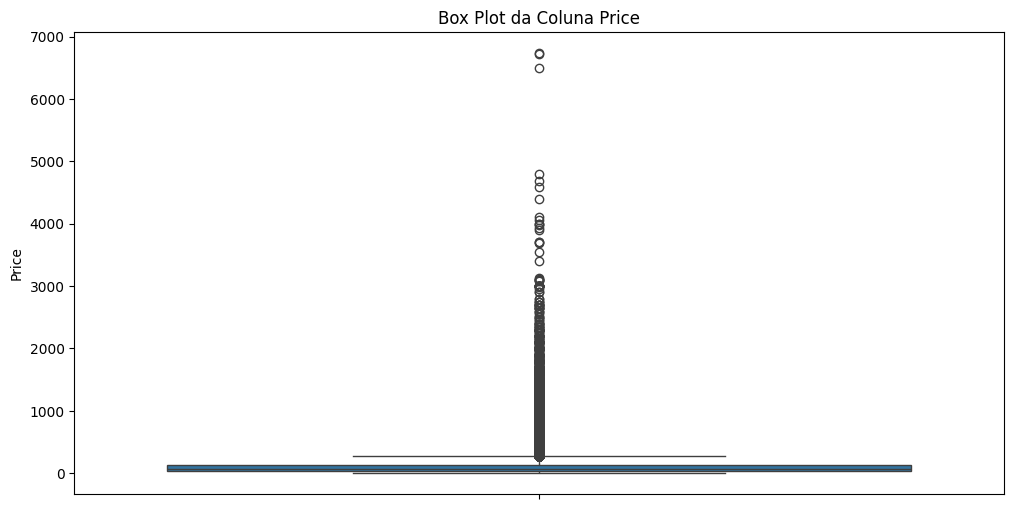

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(y=df['price'])
plt.title('Box Plot da Coluna Price')
plt.ylabel('Price')
plt.show()

### Tratando valores nulos em `df3`

In [57]:
# Preenchendo valores nulos em colunas numéricas com a média
for col in ['product_name_lenght', 'product_description_lenght', 'product_photos_qty',
            'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
    if df3[col].isnull().any():
        df3[col].fillna(df3[col].mean(), inplace=True)

# Preenchendo valores nulos em colunas categóricas com a moda
if df3['product_category_name'].isnull().any():
    df3['product_category_name'].fillna(df3['product_category_name'].mode()[0], inplace=True)

print("Valores nulos em df3 após o tratamento:")
print(df3.isnull().sum())

Valores nulos em df3 após o tratamento:
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


/tmp/ipython-input-2907577674.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df3[col].fillna(df3[col].mean(), inplace=True)
/tmp/ipython-input-2907577674.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

### Tratando valores nulos em `df2`

In [58]:
#Usar mesma logica para as colunas faltantes, já que o número de nulos é significativo
#É um data set de vendas, por n mótivos podemos ter nulos, sendo o possívelmente o principal
#deles a falta de atualização de dos dados, por parte do cliente, correios e própria empresa


# Se não foi aprovado, consideramos que foi aprovado no mesmo momento da compra
df2['order_approved_at'].fillna(df2['order_purchase_timestamp'], inplace=True)

# Caso não enviado, considerar envio como 1 dia após aprovação
df2['order_delivered_carrier_date'].fillna(
    df2['order_approved_at'] + pd.Timedelta(days=1),inplace=True)

# Não foi entregue, consideramos que chegou na data estimada
df2['order_delivered_customer_date'].fillna(
    df2['order_estimated_delivery_date'],inplace=True)
print("Nulos em df2 já tratados:")
print(df2.isnull().sum())

Nulos em df2 já tratados:
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


/tmp/ipython-input-3037804616.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['order_approved_at'].fillna(df2['order_purchase_timestamp'], inplace=True)
/tmp/ipython-input-3037804616.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

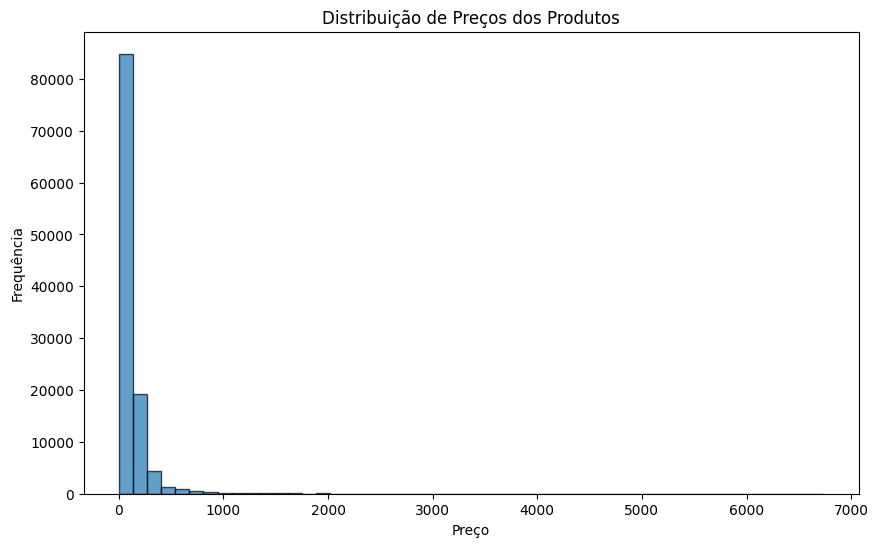

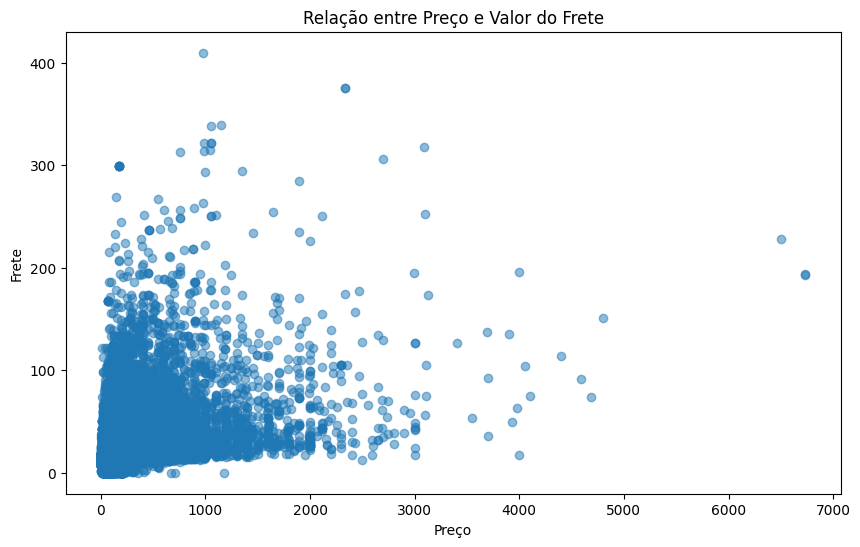

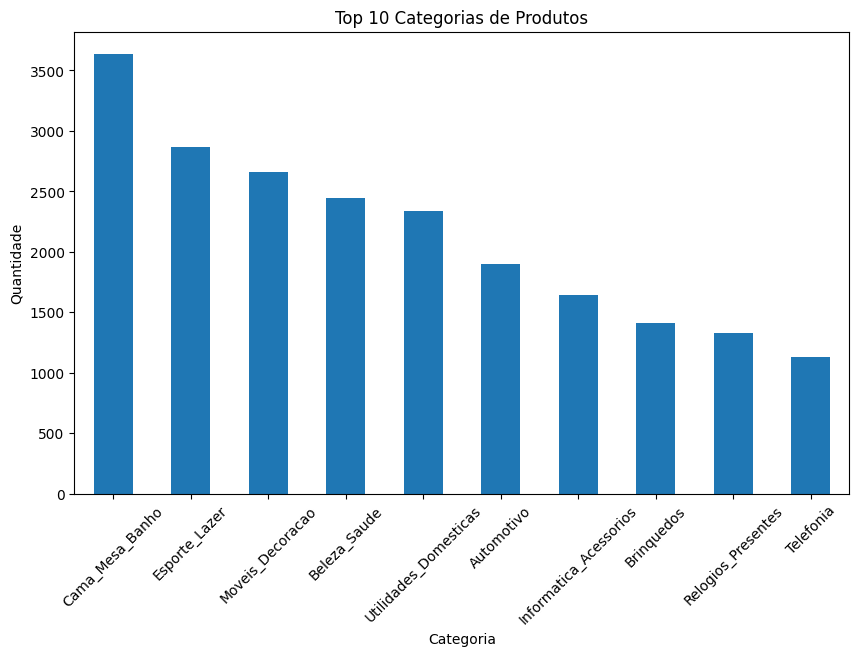

In [59]:
# Gráficos básicos para análise
import matplotlib.pyplot as plt

# 1. Distribuição de preços
plt.figure(figsize=(10, 6))
plt.hist(df['price'].dropna(), bins=50, alpha=0.7, edgecolor='black')
plt.title('Distribuição de Preços dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

# 2. Preço vs Frete
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['freight_value'], alpha=0.5)
plt.title('Relação entre Preço e Valor do Frete')
plt.xlabel('Preço')
plt.ylabel('Frete')
plt.show()

# 3. Top categorias de produtos
if 'product_category_name' in df3.columns:
    top_categorias = df3['product_category_name'].value_counts().head(10)

    plt.figure(figsize=(10, 6))
    top_categorias.plot(kind='bar')
    plt.title('Top 10 Categorias de Produtos')
    plt.xlabel('Categoria')
    plt.ylabel('Quantidade')
    plt.xticks(rotation=45)
    plt.show()

In [60]:
# Codificação simples de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

# Codificar categoria de produto
if 'product_category_name' in df.columns:
    le = LabelEncoder()
    df['product_category_encoded'] = le.fit_transform(
        df['product_category_name'].fillna('unknown')
    )
    print(f"Categorias codificadas: {len(le.classes_)}")

# Codificar status do pedido
if 'order_status' in df.columns:
    status_dummies = pd.get_dummies(df['order_status'], prefix='status')
    df_completo = pd.concat([df, status_dummies], axis=1)
    print("Status do pedido codificado")